# Fashion MNIST 데이터셋을 활용한 의류 (0~9) 예측하는 다중분류

## 데이터 준비하기

In [16]:
from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print('X_train.shape : ', X_train.shape)
print('X_test.shape : ', X_test.shape)

X_train.shape :  (60000, 28, 28)
X_test.shape :  (10000, 28, 28)


## MNIST 데이터 형태 확인하기

### 훈련 데이터셋

In [17]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('y_train: ', y_train)

X_train.shape:  (60000, 28, 28)
y_train.shape:  (60000,)
y_train:  [9 0 0 ... 3 0 5]


In [18]:
print(X_train[0]) # 0~255

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### 테스트 데이터셋

In [19]:
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('y_test: ', y_test)

X_test.shape:  (10000, 28, 28)
y_test.shape:  (10000,)
y_test:  [9 2 1 ... 8 1 5]


### 데이터 그려보기

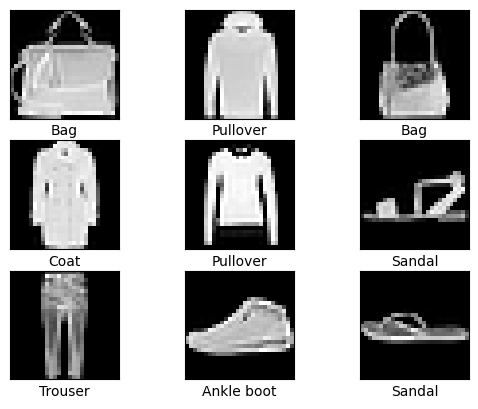

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(7)

# 0 ~ 9 레이블 정보 저장
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

sample_size = 9
# 0 ~ 59999의 범위 내에서 무작위로 9개 정수 추출
random_idx = np.random.randint(60000, size=sample_size)
for i, idx in enumerate(random_idx) :
  plt.subplot(3, 3, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[idx], cmap='gray')
  plt.xlabel(class_names[y_train[idx]])
plt.show()

## 데이터 전처리


*   스케일링 (범위 축소, 0~1)
*   레이블 범주형으로 변경



In [6]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

### 데이터 스케일링 (범위축소, 0~1)

In [7]:
# 값의 범위를 0~255 -> minmax 알고리즘을 사용 -> 0~1 범위 축소
X_train = X_train /255
X_test = X_test/255

print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

### 레이블 : 범주형으로 변경

In [8]:
from keras.utils import to_categorical

# 실제 정답 비교를 위해 0~9 라벨링된 데이터 따로 저장
real_y_test = y_test

# 각 데이터의 레이블을 범주형으로 변경
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('real_y_test[0] : ', real_y_test[0])
print('y_test[0] : ', y_test[0])

real_y_test[0] :  9
y_test[0] :  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## 검증 데이터셋 분리

In [9]:
from sklearn.model_selection import train_test_split

# 훈련 데이터셋 (70%), 검증 데이터셋 (30%)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=7)

In [10]:
print('X_train.sheap : ', X_train.shape)
print('X_val.sheap : ', X_val.shape) # 확인 작업

X_train.sheap :  (42000, 28, 28)
X_val.sheap :  (18000, 28, 28)


## 첫 번째 모델 구성하기

In [11]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

first_model = Sequential()

first_model.add(Flatten(input_shape = (28, 28))) # Flatten(28,28) -> 1차원 784로 변환
first_model.add(Dense(64, activation='relu'))
first_model.add(Dense(32, activation='relu'))
first_model.add(Dense(10, activation='softmax')) # 10개로 최종 출력, softmax

## 첫 번째 모델 설정하기

In [12]:
first_model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

## 첫 번째 모델 학습하기

In [13]:
first_history = first_model.fit(X_train, y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 6ms/step - loss: 0.6777 - acc: 0.7715 - val_loss: 0.5139 - val_acc: 0.8188
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.4532 - acc: 0.8419 - val_loss: 0.4304 - val_acc: 0.8513
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4073 - acc: 0.8566 - val_loss: 0.3894 - val_acc: 0.8642
Epoch 4/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3904 - acc: 0.8627 - val_loss: 0.3805 - val_acc: 0.8659
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3681 - acc: 0.8683 - val_loss: 0.3834 - val_acc: 0.8662
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3525 - acc: 0.8733 - val_loss: 0.3661 - val_acc: 0.8684
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3325 - acc: 0.8793 - val_loss: 0.3455 - val_acc: 0.8759
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

## 두 번째 모델 구성 및 학습하기

In [ ]:
# 모델 구성하기
second_model = Sequential()

second_model.add(Flatten(input_shape = (28, 28))) # Flatten(28,28) -> 1차원 784로 변환
second_model.add(Dense(128, activation='relu')) # 첫 번째 모델보다 층 하나 더 추
second_model.add(Dense(64, activation='relu'))
second_model.add(Dense(32, activation='relu'))
second_model.add(Dense(10, activation='softmax')) # 10개로 최종 출력, softmax

# 모델 설정하기
second_model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

# 모델 학습하기
second_history = second_model.fit(X_train, y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 3s 7ms/step - loss: 0.6228 - acc: 0.7822 - val_loss: 0.4487 - val_acc: 0.8367
Epoch 2/30
329/329 [==============================] - 2s 6ms/step - loss: 0.4182 - acc: 0.8522 - val_loss: 0.4146 - val_acc: 0.8505
Epoch 3/30
329/329 [==============================] - 2s 6ms/step - loss: 0.3769 - acc: 0.8653 - val_loss: 0.3569 - val_acc: 0.8736
Epoch 4/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3435 - acc: 0.8756 - val_loss: 0.3404 - val_acc: 0.8767
Epoch 5/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3265 - acc: 0.8819 - val_loss: 0.3438 - val_acc: 0.8728
Epoch 6/30
329/329 [==============================] - 2s 7ms/step - loss: 0.3114 - acc: 0.8858 - val_loss: 0.3304 - val_acc: 0.8818
Epoch 7/30
329/329 [==============================] - 3s 9ms/step - loss: 0.2933 - acc: 0.8929 - val_loss: 0.3261 - val_acc: 0.8821
Epoch 8/30
329/329 [==============================] - 2s 6ms/step - loss: 0

## 모델 학습 결과 분석


*   두 모델 모두 과대적합의 경향이 있다.
*   첫번째 모델은 epoch 12 이후부터 손실값이 상승하고, 훈련 정확도가 검증 정확도와의 차이가 발생함 -> epoch 12 학습 시킨 후 평가
*   두번째 모델은 epoch 10 이후부터 손실값이 상승하고, 훈련 정확도가 검증 정확도와의 차이가 발생함 -> epoch 10 학습 시킨 후 평가


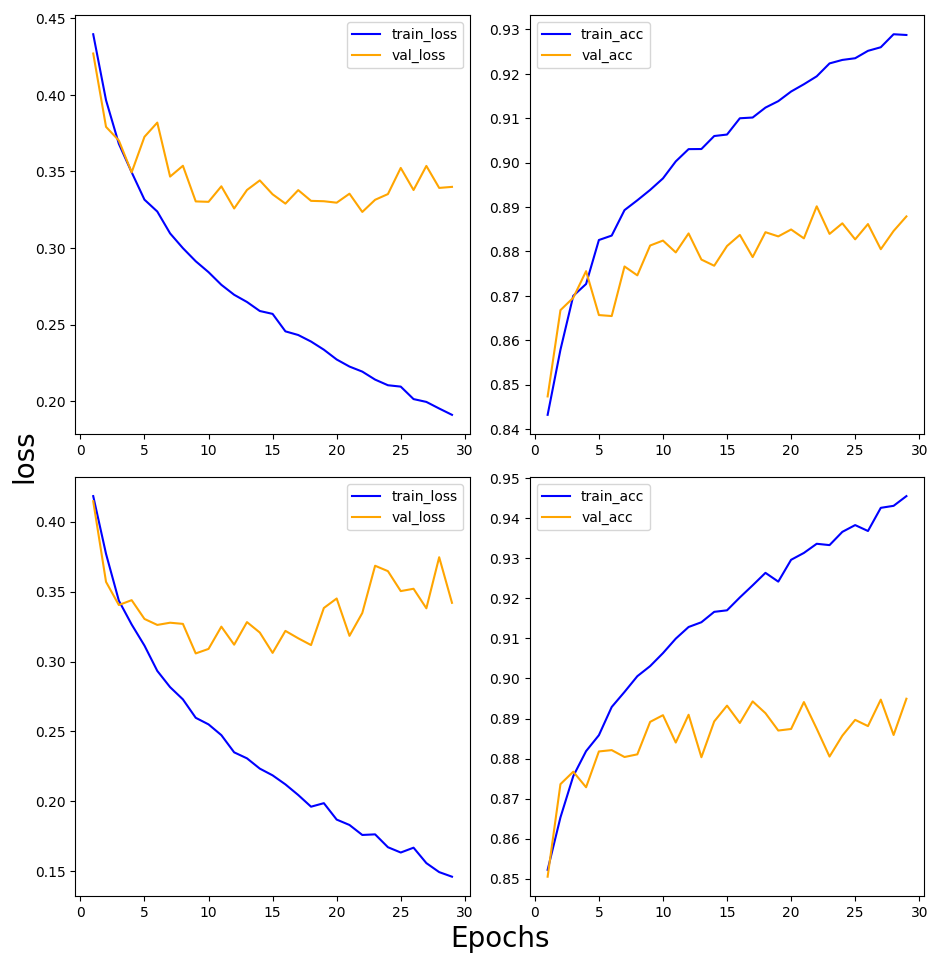

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def draw_loss_acc(history_1, history_2, epochs):
    his_dict_1 = history_1.history
    his_dict_2 = history_2.history
    keys = list(his_dict_1.keys())

    epochs = range(1, epochs)
    fig = plt.figure(figsize = (10, 10))
    ax = fig.add_subplot(1, 1, 1)
    # axis 선과 ax의 축 레이블을 제거합니다.
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)

    for i in range(len(his_dict_1)):
        temp_ax = fig.add_subplot(2, 2, i + 1)
        temp = keys[i%2]
        val_temp = keys[(i + 2)%2 + 2]
        temp_history = his_dict_1 if i < 2 else his_dict_2
        temp_ax.plot(epochs, temp_history[temp][1:], color = 'blue', label = 'train_' + temp)
        temp_ax.plot(epochs, temp_history[val_temp][1:], color = 'orange', label = val_temp)
        if(i == 1 or i == 3):
            start, end = temp_ax.get_ylim()
            temp_ax.yaxis.set_ticks(np.arange(np.round(start, 2), end, 0.01))
        temp_ax.legend()
    ax.set_ylabel('loss', size = 20)
    ax.set_xlabel('Epochs', size = 20)
    plt.tight_layout()
    plt.show()

draw_loss_acc(first_history, second_history, 30)

## 모델 성능평가 비교

In [14]:
first_model.evaluate(X_test, y_test)
second_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3944 - acc: 0.8743


NameError: ignored

## 혼동 행렬


*   first_model : 0 (T-shirt/top), 2 (Pullover), 6 (Shirt) -> 정확도 낮음 -> 데이터 추가 -> 추가 학습 필요
*   second_model : 6(Shirt) 정확도 낮음 -> 데이터 추가 -> 추가 학습 <br>(유독 6번 레이블 -> 0 레이블로 많이 예측)



313/313 [==============================] - 1s 2ms/step


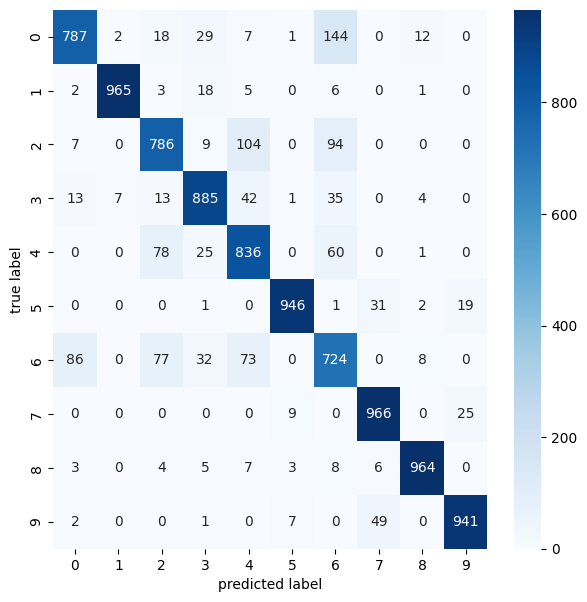

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = first_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis =1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt= 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

## 모델 예측해서 그려보기

In [ ]:
results = first_model.predict(X_test)
arg_results = np.argmax(results, axis=1)

random_idx = np.random.randint(10000)

plt.figure(figsize=(3,3), dpi = 100)
plt.xticks([])
plt.yticks([])
plt.imshow(X_test[random_idx], cmap ='gray')
plt.title('Predicted value of the image : ' + class_names[arg_results[random_idx]] + ', Real value of tje image : ' + class_names[real_y_test[random_idx]])

plt.show()

## 세 번째 모델 구성


*   256, 128, 64, 32, 10 5개의 레이어로 모델 구성
*   모델 설정, 학습 이전 모델과 동일하게 설정
*   모델 학습 후 history 변수에 담아 결과 분석
*   모델 성능평가 (evaluate(), 혼동행렬) 그리고 향후 발전방향 수립
*   수요일에 랜덤하게 2팀 뽑아서 발표


### 세 번째 모델 구성하기

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

third_model = Sequential()

third_model.add(Flatten(input_shape = (28, 28))) # Flatten(28,28) -> 1차원 784로 변환
third_model.add(Dense(256, activation='relu')) # 256개의 층 생성하기
third_model.add(Dense(128, activation='relu')) # 128개의 층 생성하기
third_model.add(Dense(64, activation='relu'))
third_model.add(Dense(32, activation='relu'))
third_model.add(Dense(10, activation='softmax')) # 10개로 최종 출력, softmax

### 세 번째 모델 설정하기

In [ ]:
third_model.compile(optimizer='adam', # 옵티마이저
              loss = 'categorical_crossentropy', # 손실함수
              metrics=['acc']) # 모니터링 할 평가지표

### 세 번째 모델 학습하기

In [ ]:
third_history = third_model.fit(X_train, y_train,
                epochs=30,
                batch_size=128,
                validation_data=(X_val, y_val))

Epoch 1/30
329/329 [==============================] - 10s 24ms/step - loss: 0.6095 - acc: 0.7835 - val_loss: 0.4811 - val_acc: 0.8339
Epoch 2/30
329/329 [==============================] - 6s 19ms/step - loss: 0.4065 - acc: 0.8544 - val_loss: 0.3829 - val_acc: 0.8607
Epoch 3/30
329/329 [==============================] - 6s 19ms/step - loss: 0.3571 - acc: 0.8694 - val_loss: 0.3471 - val_acc: 0.8779
Epoch 4/30
329/329 [==============================] - 3s 10ms/step - loss: 0.3336 - acc: 0.8768 - val_loss: 0.3398 - val_acc: 0.8787
Epoch 5/30
329/329 [==============================] - 3s 9ms/step - loss: 0.3062 - acc: 0.8878 - val_loss: 0.3386 - val_acc: 0.8739
Epoch 6/30
329/329 [==============================] - 4s 13ms/step - loss: 0.2942 - acc: 0.8888 - val_loss: 0.3224 - val_acc: 0.8822
Epoch 7/30
329/329 [==============================] - 3s 10ms/step - loss: 0.2775 - acc: 0.8969 - val_loss: 0.3476 - val_acc: 0.8756
Epoch 8/30
329/329 [==============================] - 3s 10ms/step - 

### 세 번째 모델 결과 분석

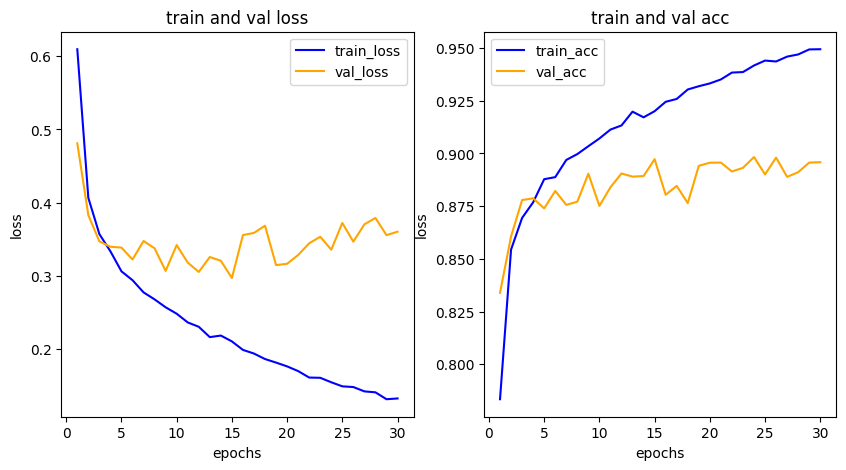

In [ ]:
import matplotlib.pyplot as plt

his_dict = third_history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show()

### 세 번째 모델 성능평가 비교

In [ ]:
third_model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.4322 - acc: 0.8847


[0.432249516248703, 0.8847000002861023]

### 세 번째 모델 혼동행렬

313/313 [==============================] - 2s 4ms/step


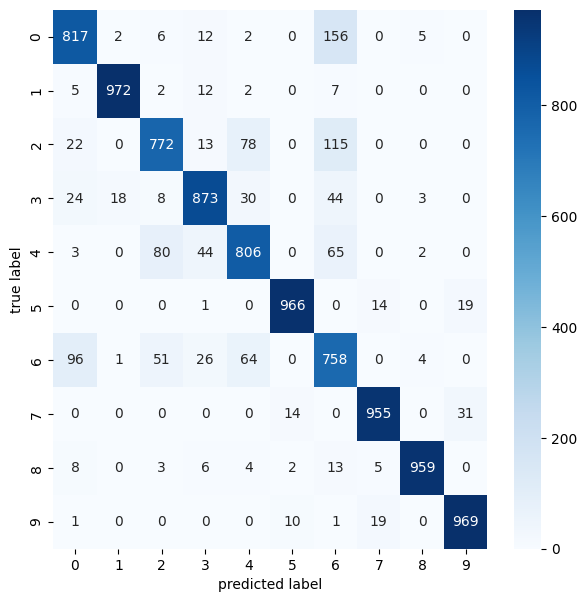

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# 모델 예측
y_pred = third_model.predict(X_test)

# 혼동 행렬 그리기
plt.figure(figsize=(7,7))
cm = confusion_matrix(np.argmax(y_test, axis =1), np.argmax(y_pred, axis=1))
sns.heatmap(cm, annot=True, fmt= 'd', cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()